# import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
import scipy.io as sio

## functions

In [2]:
def linear_svm(x, y):
    clf = LinearSVC()
    clf.fit(x, y)
    return clf, clf.coef_[0], clf.intercept_[0]


def data_plot_svm(point, label, w, b, title):
    df = pd.DataFrame(np.concatenate([point, np.array([label]).T], axis=1),
                      columns=['x1', 'x2', 'class'])
    negative_pt = df[df['class'] == -1]
    one_pt = df[df['class'] == 1]
    negative_px = negative_pt["x1"]
    negative_py = negative_pt["x2"]
    one_px = one_pt["x1"]
    one_py = one_pt["x2"]
    lx = np.linspace(df['x1'].min(), df['x1'].max(), num=100)
    ly = (- w[0] * lx - b) / w[1]
    plt.scatter(negative_px, negative_py, c="red", label="-1")
    plt.scatter(one_px, one_py, c="yellow", label="1")
    plt.plot(lx, ly, label="Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title(title)
    plt.show()

## analysis

#### load data and clean data

In [3]:
d1 = sio.loadmat('./data/hw03_dataset.mat')
d1.pop('__header__')
d1.pop('__version__')
d1.pop('__globals__')
x_trn = d1["X_trn"]
y_trn = d1["Y_trn"].T[0]
y_trn = np.where(y_trn == 0, -1, y_trn)
x_tst = d1["X_tst"]
y_tst = d1["Y_tst"].T[0]
y_tst = np.where(y_tst == 0, -1, y_tst)

#### train model

In [4]:
svm_model, w, b = linear_svm(x_trn, y_trn)

#### reporting errors

In [5]:
score_trn = svm_model.score(x_trn, y_trn)
score_tst = svm_model.score(x_tst, y_tst)
print("Error on training set: {}".format(score_trn))
print("Error on testing set: {}".format(score_tst))
print("w: {}, b: {}".format(w, b))

Error on training set: 0.9761904761904762
Error on testing set: 1.0
w: [ 1.52975904 -0.4849681 ], b: 0.7986592106899358


#### plot data

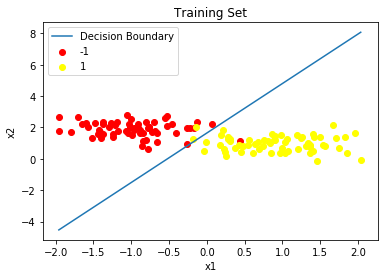

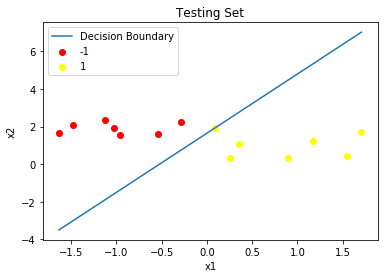

In [6]:
data_plot_svm(x_trn, y_trn, w, b, "Training Set")
data_plot_svm(x_tst, y_tst, w, b, "Testing Set")